In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random

import os
import sys
sys.path.append('../src')

from math_utils import *
from model import *
from utils import *

SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# QR

## Complexity Analysis

Show that our implementation scale linearly in "m"

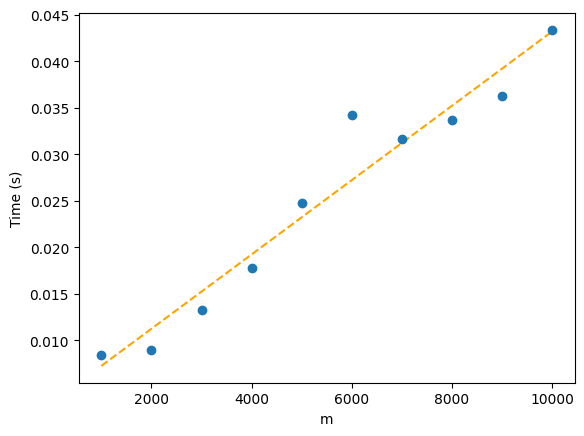

In [ ]:
plot_time_mean_variance_incr_n(n=256, trials=5, START=1000, END=10001, STEP=1000)

In [ ]:
plot_time_mean_variance_incr_n(n=512, trials=5, START=1000, END=10001, STEP=1000)

Show that our implementation scale linearly in "n"

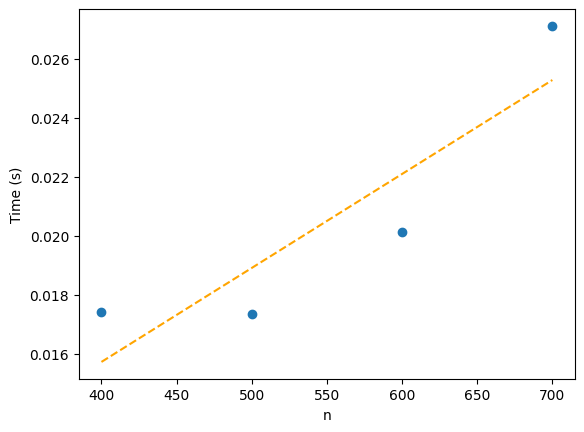

In [4]:
plot_time_mean_variance_incr_m(m=2000, trials=5, START=400, END=701, STEP=100)

## Accuracy Analisys

# Least-Square Problem

## Complexity Analysis

## Accuracy Analysis